In [1]:
#Importing independencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive


In [2]:
#Mount google drive and load the data
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/MyDrive/Datasets/Datasets/HR_comma_sep.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**Data PreProcessing:**

---
---

> 1- Chnage the position of (Dependent Variable: 'left') attribute to last index in dataset


> 2- Converting non categorical values in our data to categorical values (2 attributes only).


> 3- Assigning Dpendent and independent variables then spliting data into test and train subsets.



> 4- Visualizing the data










In [4]:
#Show stats of our data
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#Moving the dependent variable to the LAST INDEX in our Dataset
left_idx = dataset.columns.get_loc('left')
dataset.insert(len(dataset.columns)-1, 'left', dataset.pop('left'))


In [6]:
print(dataset.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'left'],
      dtype='object')


In [7]:
#Converting non categorical values in our data to categorical values (2 attributes only)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Department_encoded'] = le.fit_transform(dataset['Department'])
dataset['Salary_encoded'] = le.fit_transform(dataset['salary'])

dataset = dataset.drop(['Department','salary'], axis=1) #Removing useless columns

#move target column to the last
dataset.insert(len(dataset.columns)-1, 'left', dataset.pop('left'))


In [8]:
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_encoded,Salary_encoded,left
0,0.38,0.53,2,157,3,0,0,7,1,1
1,0.80,0.86,5,262,6,0,0,7,2,1
2,0.11,0.88,7,272,4,0,0,7,2,1
3,0.72,0.87,5,223,5,0,0,7,1,1
4,0.37,0.52,2,159,3,0,0,7,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1,1
14995,0.37,0.48,2,160,3,0,0,8,1,1
14996,0.37,0.53,2,143,3,0,0,8,1,1
14997,0.11,0.96,6,280,4,0,0,8,1,1


In [9]:
#Assigning the dependent and independent variables
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [10]:
print(X,y)

[[0.38 0.53 2.   ... 0.   7.   1.  ]
 [0.8  0.86 5.   ... 0.   7.   2.  ]
 [0.11 0.88 7.   ... 0.   7.   2.  ]
 ...
 [0.37 0.53 2.   ... 0.   8.   1.  ]
 [0.11 0.96 6.   ... 0.   8.   1.  ]
 [0.37 0.52 2.   ... 0.   8.   1.  ]] [1 1 1 ... 1 1 1]


In [11]:
X

array([[0.38, 0.53, 2.  , ..., 0.  , 7.  , 1.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 7.  , 2.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 7.  , 2.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 8.  , 1.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 8.  , 1.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 8.  , 1.  ]])

In [12]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [18]:
# Train the model and pass the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

# Train the model on only important features
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Fit the RFE model to the training data
rfe = RFE(estimator=model, n_features_to_select=3)

# Fit the RFE model to the training data
X_train_rfe = rfe.fit_transform(X_train, y_train)

# Fit the logistic regression model on the selected features
model.fit(X_train_rfe, y_train)


LogisticRegression(max_iter=1000)

In [19]:

#Predicting the class
X_test_rfe = rfe.transform(X_test)
prediction = model.predict(X_test_rfe[[826]])
prediction

array([0])

In [20]:
#CHecking the model's Accuracy (Accuracy is not so good because of data)
from sklearn.metrics import accuracy_score
model.score(X_test_rfe, y_test)

0.7637777777777778

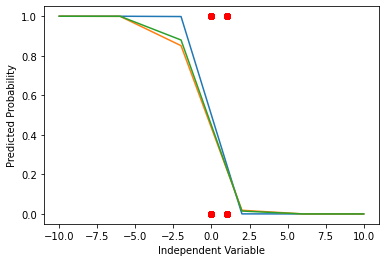

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of values for the independent variable
x = np.linspace(-10, 10, 6)

# Reshape the coefficients to match the shape of x
coef = model.coef_.reshape(-1, 3)

# Calculate the predicted probability for each value in the range
y = 1 / (1 + np.exp(-x.reshape(-1, 1) * coef + model.intercept_))

# Plot the predicted probabilities against the independent variable
plt.scatter(X_test_rfe[:,1], y_test, color='r')
plt.plot(x, y)
plt.xlabel('Independent Variable')
plt.ylabel('Predicted Probability')
plt.show()
